In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import missingno as mso
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

In [2]:
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

In [3]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [5]:
train.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


# Find shape of our dataset(Number of rows and number of columns)

In [6]:
print("Number of rows in train dataset", train.shape[0])
print("Number of columns train dataset", train.shape[1])
print("Number of rows in test dataset", test.shape[0])
print("Number of columns in test dataset", test.shape[1])

Number of rows in train dataset 614
Number of columns train dataset 12
Number of rows in test dataset 367
Number of columns in test dataset 11


# All Information about our dataset

In [9]:
train.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [12]:
test.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,3.670000e+02,3.670000e+02,3.670000e+02,361.000000,338.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.537396,0.825444
std,4.910685e+05,2.334232e+05,6.296143e+06,65.156643,0.380150
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000


In [17]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [16]:
test.isnull().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [18]:
train.isnull().sum()*100 / len(train)

Gender                2.117264
Married               0.488599
Dependents            2.442997
Education             0.000000
Self_Employed         5.211726
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  2.280130
Credit_History        8.143322
Area                  0.000000
Status                0.000000
dtype: float64

In [19]:
test.isnull().sum()*100 / len(test)

Gender                2.997275
Married               0.000000
Dependents            2.724796
Education             0.000000
Self_Employed         6.267030
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  1.634877
Credit_History        7.901907
Area                  0.000000
dtype: float64

In [20]:
columns = ['Gender','Married','Dependents','Term']

In [21]:
train = train.dropna(subset = columns)

In [22]:
train.isnull().sum()*100 / len(train)

Gender                0.000000
Married               0.000000
Dependents            0.000000
Education             0.000000
Self_Employed         5.410122
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  0.000000
Credit_History        8.551483
Area                  0.000000
Status                0.000000
dtype: float64

In [23]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
train['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [25]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [26]:
train.isnull().sum()*100 / len(train)

Gender                0.000000
Married               0.000000
Dependents            0.000000
Education             0.000000
Self_Employed         0.000000
Applicant_Income      0.000000
Coapplicant_Income    0.000000
Loan_Amount           0.000000
Term                  0.000000
Credit_History        8.551483
Area                  0.000000
Status                0.000000
dtype: float64

In [27]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [28]:
train['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [29]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [30]:
train.isnull().sum()*100 / len(train)

Gender                0.0
Married               0.0
Dependents            0.0
Education             0.0
Self_Employed         0.0
Applicant_Income      0.0
Coapplicant_Income    0.0
Loan_Amount           0.0
Term                  0.0
Credit_History        0.0
Area                  0.0
Status                0.0
dtype: float64

In [31]:
columns_1 = ['Gender','Dependents','Term']

In [32]:
test = test.dropna(subset = columns_1)

In [33]:
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [34]:
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [35]:
test.isnull().sum()*100 / len(test)

Gender                0.0
Married               0.0
Dependents            0.0
Education             0.0
Self_Employed         0.0
Applicant_Income      0.0
Coapplicant_Income    0.0
Loan_Amount           0.0
Term                  0.0
Credit_History        0.0
Area                  0.0
dtype: float64

# Handling categorical columns

In [36]:
train.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
129,Male,Yes,0,Graduate,No,608000,256900.0,18200000,360.0,1.0,Rural,N
449,Male,No,1,Not Graduate,Yes,276900,154200.0,19000000,360.0,1.0,Semiurban,N
17,Female,No,0,Graduate,No,351000,0.0,7600000,360.0,0.0,Urban,N
118,Male,Yes,0,Graduate,No,556800,214200.0,17500000,360.0,1.0,Rural,N
577,Male,No,0,Graduate,No,322900,273900.0,11000000,360.0,1.0,Urban,Y


In [37]:
train['Dependents']

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 573, dtype: object

In [38]:
train['Dependents'] = train['Dependents'].replace(to_replace = "3+", value = '4')

In [39]:
train['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [40]:
train['Gender'] = train['Gender'].map({'Male':1,'Female':0}).astype('int')
train['Married'] = train['Married'].map({'Yes':1,'No':0}).astype('int')
train['Education'] = train['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
train['Area'] = train['Area'].map({'Rural':1,'Urban':0,'Semiurban':2}).astype('int')
train['Status'] = train['Status'].map({'Y':1,'N':0}).astype('int')

In [41]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,0,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,1,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,0,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,0,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,0,1


In [42]:
test['Dependents']

0       0
1       1
2       2
3       2
4       0
       ..
362    3+
363     0
364     0
365     0
366     0
Name: Dependents, Length: 341, dtype: object

In [43]:
test['Dependents'] = test['Dependents'].replace(to_replace = "3+", value = '4')

In [44]:
test['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [45]:
test['Gender'] = test['Gender'].map({'Male':1,'Female':0}).astype('int')
test['Married'] = test['Married'].map({'Yes':1,'No':0}).astype('int')
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
test['Area'] = test['Area'].map({'Rural':1,'Urban':0,'Semiurban':2}).astype('int')

In [46]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,1,1,0,1,0,572000,0,11000000,360.0,1.0,0
1,1,1,1,1,0,307600,150000,12600000,360.0,1.0,0
2,1,1,2,1,0,500000,180000,20800000,360.0,1.0,0
3,1,1,2,1,0,234000,254600,10000000,360.0,1.0,0
4,1,0,0,0,0,327600,0,7800000,360.0,1.0,0


# EDA

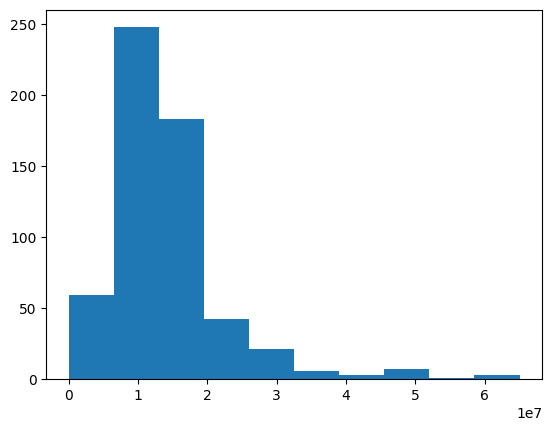

In [47]:
plt.hist(train['Loan_Amount'])
plt.show()

<Axes: >

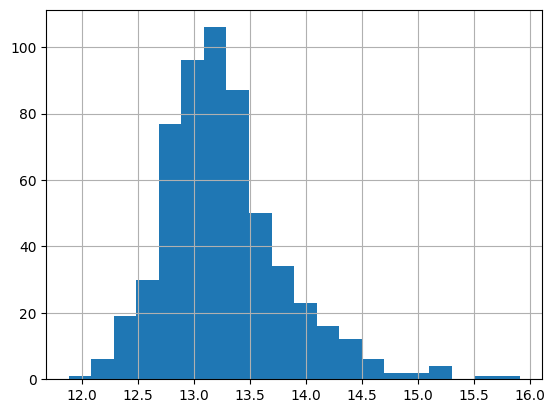

In [48]:
train['TotalIncome']=train['Applicant_Income']+train['Coapplicant_Income']
train['TotalIncome']=np.log(train['TotalIncome'])
train['TotalIncome'].hist(bins=20)

Number of people who took loan by gender
1    467
0    106
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

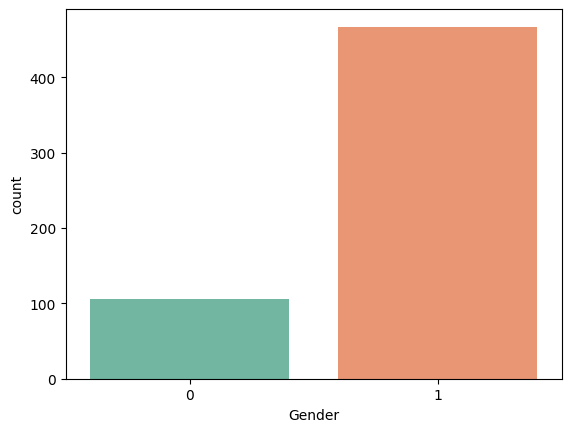

In [49]:
print("Number of people who took loan by gender")
print(train['Gender'].value_counts())
sns.countplot(x='Gender',data=train,palette='Set2')

<Axes: xlabel='Status', ylabel='count'>

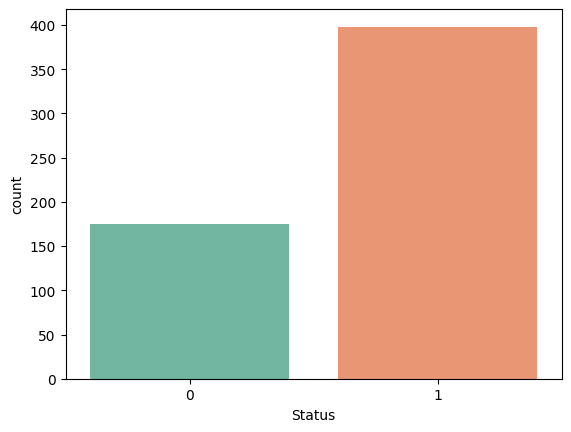

In [50]:
sns.countplot(x="Status",data=train,palette="Set2")

Number of people who took loan by Marital staus
1    372
0    201
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

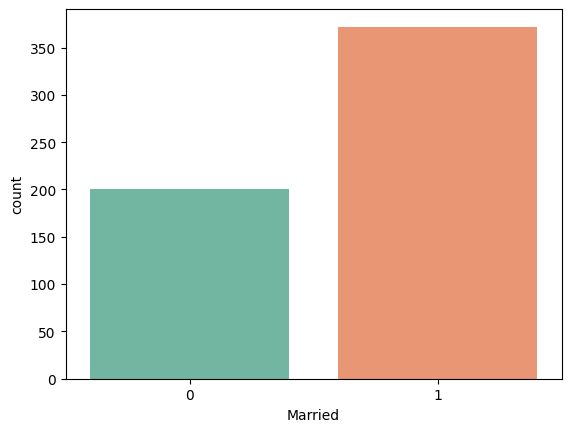

In [51]:
print("Number of people who took loan by Marital staus")
print(train['Married'].value_counts())
sns.countplot(x='Married',data=train,palette='Set2')

Number of people who took loan by Dependency
0    327
1    100
2     99
4     47
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

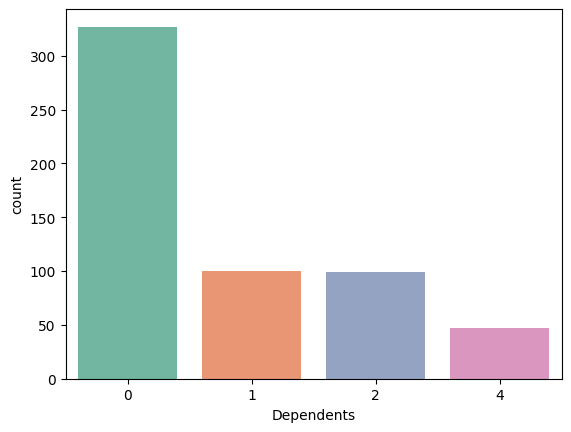

In [52]:
print("Number of people who took loan by Dependency")
print(train['Dependents'].value_counts())
sns.countplot(x='Dependents',data=train,palette='Set2')

Number of people who took loan by CreditHistory
1.0    498
0.0     75
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

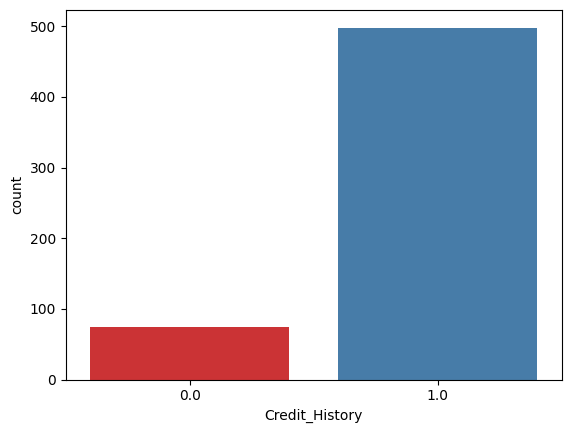

In [53]:
print("Number of people who took loan by CreditHistory")
print(train['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=train,palette='Set1')

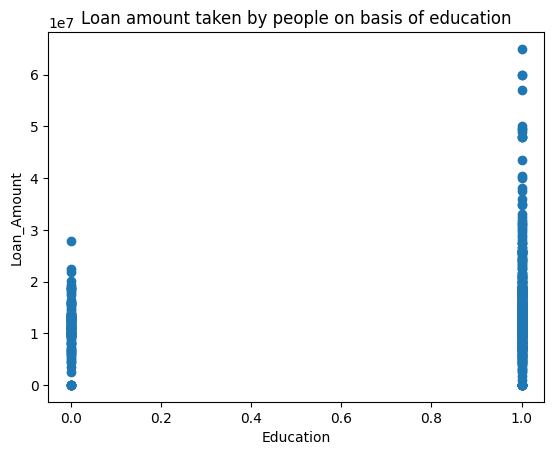

In [54]:
plt.title('Loan amount taken by people on basis of education')
plt.xlabel('Education')
plt.ylabel('Loan_Amount')
plt.scatter(train['Education'],train['Loan_Amount'])

<Axes: xlabel='Loan_Amount'>

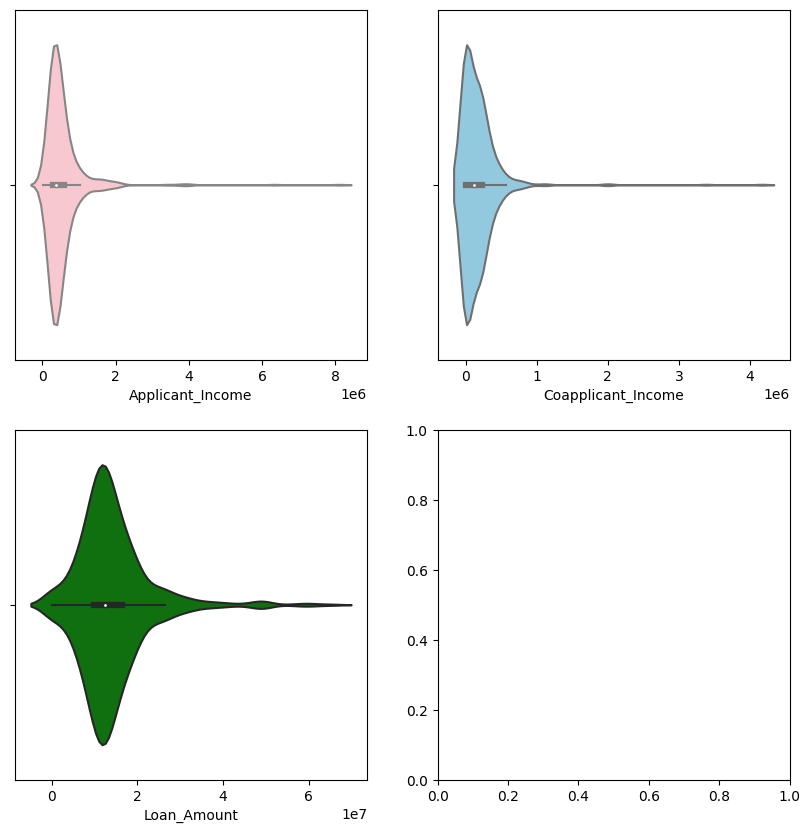

In [55]:
sns.set_style='white'
fig,axs=plt.subplots(2,2,figsize=(10,10))
sns.violinplot(data=train,x="Applicant_Income",color='pink',kde=True,ax=axs[0,0])
sns.violinplot(data=train,x="Coapplicant_Income",color='skyblue',kde=True,ax=axs[0,1])
sns.violinplot(data=train,x="Loan_Amount",color='green',kde=True,ax=axs[1,0])

<Axes: xlabel='Status', ylabel='Applicant_Income'>

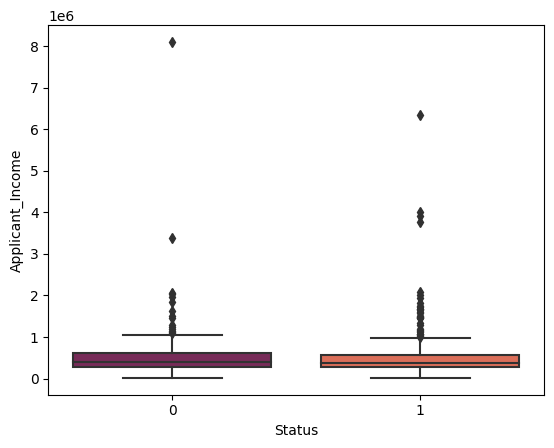

In [56]:
sns.boxplot(x='Status',y='Applicant_Income',data=train,palette='rocket')

In [57]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,TotalIncome
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,0,1,13.279196
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,1,0,13.319738
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,0,1,12.611538
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,0,1,13.110493
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,0,1,13.304685


In [58]:
train = train.drop(["TotalIncome"], axis=1)

# Store Feature Matrix in X and response(Target) in Vector y

In [60]:
X = train.drop('Status', axis = 1)
y = train['Status']

In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Status, Length: 573, dtype: int32

# Model Selection

# 1. Logistic Regression

In [66]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.3 MB 2.3 MB/s eta 0:00:04
      --------------------------------------- 0.2/8.3 MB 2.0 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.3 MB 2.7 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/8.3 MB 5.0 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.3 MB 6.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/8.3 MB 6.4 MB/s eta 0:00:02
     ------------- -------------------------- 2.8/8.3 MB 10.1 MB/s eta 0:00:01
     ----------------- ---------------------- 3.5/8.3 MB 11.3 MB/s eta 0:00:01
     -------------------- ------------------- 4.3/8.3 MB 11.9 MB/s eta 0:00:01
     ------------------------ --------------- 5.0/8.3 MB 12.9 MB/s eta 0:00:01
     --------------------------- ------------ 5.8/8.3 MB 12.2 MB/s eta 0:00:01
     ------------------------------- -------- 6.5/8.3 MB 13.0 MB/s

In [67]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [69]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = clf.predict(X_test)

In [71]:
accuracy_log = clf.score(X_test,y_test)


In [73]:
accuracy_log

0.6869565217391305

# 2. KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
y_pred = knn.predict(X_test)

In [94]:
accuracy_knn = knn.score(X_test,y_test)
accuracy_knn

0.6434782608695652

# 3. Support vector classifier

In [79]:
from sklearn import svm

In [80]:
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [81]:
y_pred = svc.predict(X_test)

In [93]:
accuracy_svc = svc.score(X_test,y_test)
accuracy_svc

0.6869565217391305

# 4. Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
y_pred = dtc.predict(X_test)

In [92]:
accuracy_dtc = dtc.score(X_test,y_test)
accuracy_dtc

0.7043478260869566

# Model Comparing

In [96]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVC',
                                  'Decision Tree'], 
                        'Accuracy': [accuracy_log*100, accuracy_knn*100, 
                                     accuracy_svc*100, accuracy_dtc*100]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Decision Tree,70.434783
0,Logistic Regression,68.695652
2,SVC,68.695652
1,K Neighbors,64.347826
